# Linear Algebra Foundations for Machine Learning and Data Science

**Purpose:** The purpose of this workbook is to help you get comfortable with the topics outlined below.

**Prereqs**
* Python Fundamentals Workbook or a good grasp of basic Python
* Numpy Workbook or a good grasp of creating and manipulating numpy arrays
* Matplotlib Workbook or a good grasp of plotting using matplotlib
    
**Recomended Usage**
* Run each of the cells (Shift+Enter) and edit them as necessary to solidify your understanding
* Do any of the exercises that are relevant to helping you understand the material

**Topics Covered**
* Matrix Representations of Data (graphs/networks, systems of equations)
* Matrix Math (vector addition/subtraction, scalar multiplication, vector multiplication - cross and dot products)
* Linearity and Transformations (transformations, linear dependence, span, basis)
* Properties of Matrices (transpose, identity, determinant, inverse, rank, column space, null space, eigenvectors)

# Workbook Setup

In [4]:
# Reload all modules before executing a new line
%load_ext autoreload
%autoreload 2

# Abide by PEP8 code style
# %load_ext pycodestyle_magic
# %pycodestyle_on

# Plot all matplotlib plots in output cell and save on close
%matplotlib inline

%load_ext tikzmagic

In [5]:
import numpy as np

import matplotlib as mpl
import matplotlib.pyplot as plt
import matplotlib.gridspec as gridspec

from mpl_toolkits.mplot3d import Axes3D

from IPython.display import YouTubeVideo

## Helper Functions

Run these cells to have the helper functions available throughout the workbook. No need to worry about how they were implemented.

In [6]:
def print_a(a):
    print('Dim: {}\nShape: {}\n{}'.format(a.ndim, a.shape, a))

In [7]:
def plot_2d_vectors(vectors=None, labels=None, colors=None, title=None):
    '''A custom vector plotting function that makes it easy to plot 2D vectors'''

    # TODO ADD KWARGS THAT CAN BE PASSED INTO THE SET FUNCTION

    # TODO input data checks
    # type(vectors) -> list of int tuple
    # type(vector_labels) -> list of strings
    # len(vectors) == len(vector_labels)
    # title == None | string
    # etc
    
    fig, ax = plt.subplots(1)

    origin = [0], [0]
    xmin, xmax = 0, 0
    ymin, ymax = 0, 0

    if colors == None:
        color_list = ['r', 'g', 'b', 'c', 'm', 'y', 'k']
        colors = np.random.choice(color_list, len(vectors))

    if labels == None:
        labels = ['V'+str(i) for i in range(len(vectors))]

    for i in range(len(vectors)):
        ax.quiver(*origin, *vectors[i], color=colors[i], label=labels[i], units='xy', scale=1)

        if vectors[i][0] < xmin:
            xmin = vectors[i][0]
        elif vectors[i][0] > xmax:
            xmax = vectors[i][0]

        if vectors[i][1] < ymin:
            ymin = vectors[i][1]
        elif vectors[i][1] > ymax:
            ymax = vectors[i][1]

    buffer = 2
    plt.xlim(xmin - buffer, xmax + buffer)
    plt.ylim(ymin - buffer, ymax + buffer)

    plt.grid()

    if title != None:
        plt.title(title)

    plt.legend()

In [8]:
def plot_3d_vectors(vectors=None, labels=None, colors=None, title=None):
    fig = plt.figure()
    ax = fig.add_subplot(111, projection='3d')

    origin = [0], [0], [0]
    xmin, xmax = 0, 0
    ymin, ymax = 0, 0
    zmin, zmax = 0, 0

    if colors == None:
        color_list = ['r', 'g', 'b', 'c', 'm', 'y', 'k']
        colors = np.random.choice(color_list, len(vectors))

    if labels == None:
        labels = ['V'+str(i) for i in range(len(vectors))]

    for i in range(len(vectors)):
        ax.quiver3D(*origin, *vectors[i], color=colors[i], label=labels[i])

        if vectors[i][0] < xmin:
            xmin = vectors[i][0]
        elif vectors[i][0] > xmax:
            xmax = vectors[i][0]

        if vectors[i][1] < ymin:
            ymin = vectors[i][1]
        elif vectors[i][1] > ymax:
            ymax = vectors[i][1]

        if vectors[i][2] < zmin:
            zmin = vectors[i][2]
        elif vectors[i][2] > zmax:
            zmax = vectors[i][2]

    print('xlim: {}, {}'.format(xmin, xmax))
    print('ylim: {}, {}'.format(ymin, ymax))
    print('zlim: {}, {}'.format(zmin, zmax))

    buffer = 2
    ax.set_xlim([xmin - buffer, xmax + buffer])
    ax.set_ylim([ymin - buffer, ymax + buffer])
    ax.set_zlim([zmin - buffer, zmax + buffer])
    
    ax.set_xlabel('x')
    ax.set_ylabel('y')
    ax.set_zlabel('z')

    plt.grid()

    if title != None:
        plt.title(title)

    plt.legend()

# 1.0 Matrix Representations of Data

Matrices are a really convenient way to represent many kinds of problems like graphs, pictures, dynamic fluids problems, and more. 

Watch the lesson and run through the examples that follow it. This lesson covers the following topics:

* Vocabulary (scalar, vector, matrix, tensor)
* Matrix/vector representations of data
* Matrix/vector Math (vector addition/subtraction, scalar multiplication, vector product (cross product), scalar product (dot product), matrix-vector multiplication)

## Lesson

*Quicktip: Play the video in 2x speed if this first lesson is too basic for you*

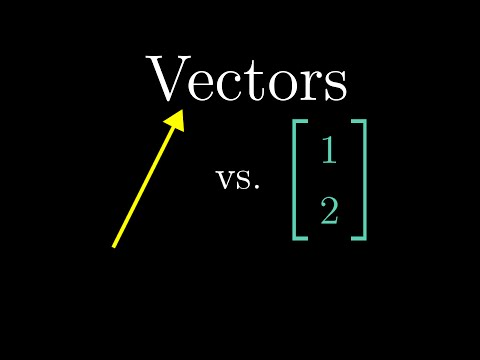

In [3]:
# Video: Vectors, what even are they?
# https://www.youtube.com/watch?v=fNk_zzaMoSs&list=PLZHQObOWTQDPD3MizzM2xVFitgF8hE_ab&index=2&t=0s
YouTubeVideo("fNk_zzaMoSs", width=600, height=350, start=0)

The words **vector**, **matrix** and **tensor** get thrown around a lot in data science and I wanted to offer some clarification on the distinction between them.

<img width="300" src="img/scalar-vector-matrix.svg"></img>

**Scalar vs Vector**

A *scalar* is just a magnitude (or value). It has no direction associated with it.

A *vector* has both a magnitude and direction.

**Vector vs Matrix vs Tensor**

All of these words are used to represent multidimensional data

A *matrix* is a grid of n × m numbers surrounded by brackets

A *vector* is a matrix with just one row or column

A *tensor* is a term used to describe a generalized matrix
- Rank 0 Tensor: has a magnitude and no direction (also called a scalar)
- Rank 1 Tensor: has a magnitude and 1 direction (also called a vector)
- Rank 2 Tensor: has a magnitude and 2 directions

### Networks as Matrices

Networks (frequently called graphs) can be represented using matrices. There are several ways to encode a graph to a matrix, here are some common ones.

#### Adjacency Matrix

An **adjacency matrix** is a square matrix used to a finite graph like this one:

![adjancy_matrix](img/adj_matrix.gif)

[Source](http://mathworld.wolfram.com/AdjacencyMatrix.html)

The elements of the matrix indicate whether pairs of vertices are adjacent (connected) or not in the graph. Prove to yourself that these matrices represent the connected edges ("edges" are what we call the lines) of the graph.

We can do this in explore it in too using the networkx package.

In [4]:
import networkx as nx

In [5]:
M1 = np.array([[0, 0, 0, 1],
               [0, 0, 0, 1],
               [0, 0, 0, 1],
               [1, 1, 1, 0]])

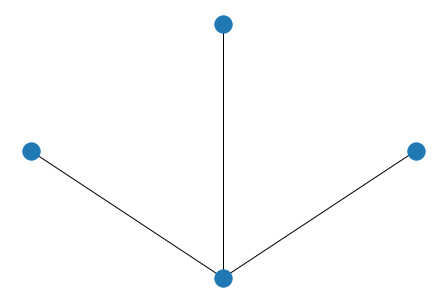

In [6]:
graph = nx.from_numpy_matrix(M1)
nx.draw_circular(graph)

We can also represent weighted graphs and directional graphs using matricies. Feel free to google around and explore these encodings on your own.

#### Laplacian Matrix

The Laplacian Matrix is another popular matrix representation of a graph. It is the degree matrix minus the adjacency matrix:

<img src="img/laplacian.png" width="600" ></img>

[Source](https://en.wikipedia.org/wiki/Laplacian_matrix)

When a graph is represented like this we can extract many useful properties of the graph like the sparsest cuts, non-cyclic, subsets and more.

### Neural Networks as Matrices

A neural network is also built from combinations of matrices. We can see below that each layer is a linear combination of the previous layer that goes through an activation function (sigmoid in the case shown below).

<div>
    <img src="img/matrix_network_3blue1brown.png" alt="Network Matrix Representation" title="Matrix Network Representation" width="60%" height="60%" />
    <figcaption>
        <a href="https://www.youtube.com/watch?v=aircAruvnKk">3Blue1Brown</a>
    </figcaption>
</div>

### Videos and Images as Matrices

Videos are just made up of multiple frames of images. An image and anything we can represent as an image is just a 3D matrix: `l x w x color`

In [7]:
import matplotlib.image as mpimg

We can see this image of a fox is just a 681x1024x3 matrix.

Image Shape: (681, 1024, 3)


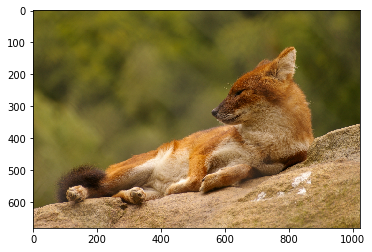

In [8]:
img_fox = mpimg.imread('img/fox.png')
print('Image Shape: {}'.format(img_fox.shape))
plt.imshow(img_fox)

If you think about it, we can represent lots of things in "images" like this. We've all seen image-like representations of a variety of sensory things like sound and pressure and more.

Here is an example of sound images that can be represented as matrices.

<img src="img/sound_image.png" width="600"></img>

[Source](https://towardsdatascience.com/sound-classification-using-images-68d4770df426)

### Physical Systems as Matrices

Physical systems like fluid flow, motion, and more can also be represented using matrices also.

Say we want to describe motion along two lines using the equations $-2x + 3y$ and $3x - 6y$. We can describe these two equations using a 2x2 matrix

${\displaystyle M ={\begin{pmatrix}-2&3\\3&-6\end{pmatrix}}}$

Then use the matrix $M$ to solve for various things like the intersection of the lines, etc.

### Vector Addition and Subtraction

We learned that vector addition is also done element-wise.

We can see the vector addition of $A$ and $B$ shown below

$$
{\displaystyle A + B = {\begin{pmatrix}1&3\\2&-2\end{pmatrix}} + {\begin{pmatrix}1&0\\0&-1\end{pmatrix}} = {\begin{pmatrix}1+1&3+0\\2+0&-2+-1\end{pmatrix}} = {\begin{pmatrix}2&3\\2&-3\end{pmatrix}}}
$$

In [16]:
A = np.array([[1, 3],
              [2, -2]])
A

array([[ 1,  3],
       [ 2, -2]])

In [17]:
B = np.array([[1, 0],
              [0, -1]])
B

array([[ 1,  0],
       [ 0, -1]])

In [18]:
AB_sum = A+B
AB_sum

array([[ 2,  3],
       [ 2, -3]])

We can also look at the addition of vectors visually by plotting them.

*Note: Since this is a 2x2 matrix and it wasn't explicitly said, we assumed rows as vectors but generally columns are used as the vector (i, j, k) as in the videos. Since addition is element-wise it doesn't matter which we chose to display in this graphic.*

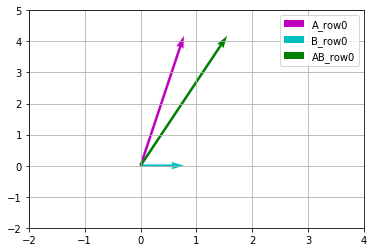

In [19]:
plot_2d_vectors([A[0], B[0], AB_sum[0]], labels=['A_row0', 'B_row0', 'AB_row0'])

&#11088; **Pause and Ponder** &#11088;

Vector subtraction works the same as vector addition. Try vector subtraction (or addition of a negative) below and explore the outcome.

In [131]:
# TRY IT HERE

In [128]:
# Define perpendicular vectors V1 and V2
V1 = np.array([2, 0])
V2 = np.array([0, 3])
V_add = V1+V2
V_sub = V1-V2

Vector plot V1 ([2 0]) + V2 ([0 3]) = V_add ([2 3])


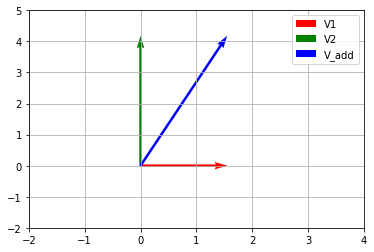

In [129]:
# Visualize addition
V_add = V1+V2
print('Vector plot V1 ({}) + V2 ({}) = V_add ({})'.format(V1, V2, V_add))
plot_2d_vectors([V1, V2, V_add], labels=['V1', 'V2', 'V_add'], colors=['r', 'g', 'b'])

Vector plot V1 ([2 0]) - V2 ([0 3]) = V_sub ([ 2 -3])


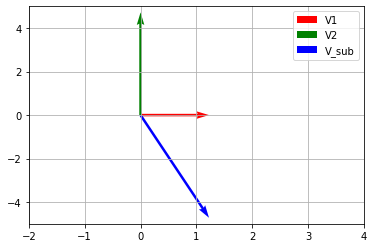

In [130]:
# Visualize subtraction
print('Vector plot V1 ({}) - V2 ({}) = V_sub ({})'.format(V1, V2, V_sub))
plot_2d_vectors([V1, V2, V_sub], labels=['V1', 'V2', 'V_sub'], colors=['r', 'g', 'b'])

We can visualize 3D vectors and their operations too.

In [80]:
# 3D Vectors
V1 = np.array([2, 0, 0])
V2 = np.array([0, 0, 3])
V_add = V1+V2
V_sub = V1-V2

Vector plot V1 ([2 0 0]), V2 ([0 0 3]), V_add ([2 0 3]), V_sub ([ 2  0 -3])
xlim: 0, 2
ylim: 0, 0
zlim: -3, 3


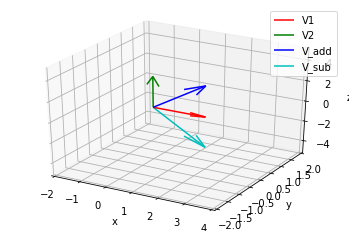

In [81]:
# Visualize them
print('Vector plot V1 ({}), V2 ({}), V_add ({}), V_sub ({})'.format(V1, V2, V_add, V_sub))
plot_3d_vectors([V1, V2, V_add, V_sub], labels=['V1', 'V2', 'V_add', 'V_sub'], colors=['r', 'g', 'b', 'c'])

### Scalar Multiplication

We learned that multiplying a matrix by a scalar just scales the matrix or vector. To do this each element in the matrix is multiplied by that element.

We can see this example the matrix $A$ is being multiplied by the scalar $c$

$$
{\displaystyle cA =c{\begin{pmatrix}1&3\\2&-2\end{pmatrix}}={\begin{pmatrix}1c&3c\\2c&-2c\end{pmatrix}}}
$$

In Python scalar multiplication looks like this, you will see in the vector plot that each vector is scaled.

In [10]:
A = np.array([[1, 3], [2, -2]])

[[ 2  6]
 [ 4 -4]]


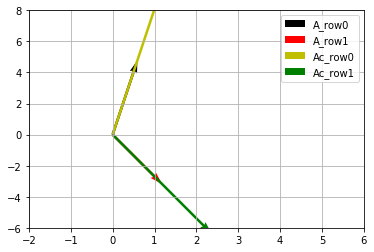

In [15]:
# Change this scalar and see how it scales the vectors
c = 2
Ac = A*c
print(Ac)
plot_2d_vectors([A[0], A[1], Ac[0], Ac[1]], labels=['A_row0', 'A_row1', 'Ac_row0', 'Ac_row1'])

### Vector Multiplication (Cross Products and Dot Products)

The cross product and dot product describe two ways of multiplying vectors.

The **cross product** (or vector product) `a × b` is defined as a vector `c` that is perpendicular (orthogonal) to both `a` and `b`.

The **dot product** (or scalar product) `a · b` takes to matricies and gives a single scalar number.

*Note: Previously we talked about multiplying a scalar by a vector in which case we perform the product on each element of the vector, in the case of multiplying two vectors however, we follow a different rule.*

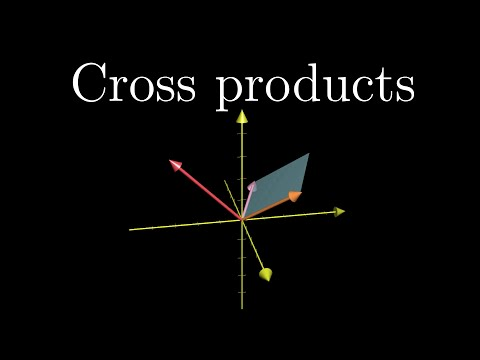

In [154]:
# Video: Cross Products
# https://www.youtube.com/watch?v=eu6i7WJeinw&list=PLZHQObOWTQDPD3MizzM2xVFitgF8hE_ab&index=11&t=0s
YouTubeVideo("eu6i7WJeinw", width=600, height=350, start=0)

**Video Summary**

* The cross product is **defined only for 3-dimensional vectors**

* Geometrically, the cross product of two vectors is the **area of the parallelogram perpendicular in the direction determined by the right hand rule**

![matrix_network](img/vector_cross_product.png)

* Algebraically, the cross product ${\displaystyle \mathbf {a\times b} ={\begin{vmatrix}\mathbf {i} &\mathbf {j} &\mathbf {k} \\a_{1}&a_{2}&a_{3}\\b_{1}&b_{2}&b_{3}\\\end{vmatrix}}}$ is as follows

> ${\displaystyle {\begin{aligned}\mathbf {a\times b} &={\begin{vmatrix}a_{2}&a_{3}\\b_{2}&b_{3}\end{vmatrix}}\mathbf {i} -{\begin{vmatrix}a_{1}&a_{3}\\b_{1}&b_{3}\end{vmatrix}}\mathbf {j} +{\begin{vmatrix}a_{1}&a_{2}\\b_{1}&b_{2}\end{vmatrix}}\mathbf {k} =(a_{2}b_{3}-a_{3}b_{2})\mathbf {i} -(a_{1}b_{3}-a_{3}b_{1})\mathbf {j} +(a_{1}b_{2}-a_{2}b_{1})\mathbf {k} ,\end{aligned}}}$

* The order of cross product matters; its determined by the right hand rule.

* The cross product is zero if two vectors are in the same direction (or exact oposite direction) from one another OR if either vector is 0.

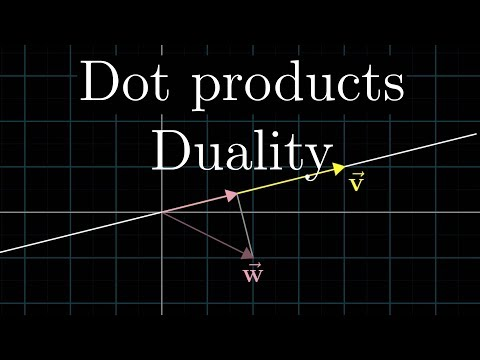

In [160]:
# Video: Dot Products
# https://www.youtube.com/watch?v=LyGKycYT2v0&list=PLZHQObOWTQDPD3MizzM2xVFitgF8hE_ab&index=10&t=0s
YouTubeVideo("LyGKycYT2v0", width=600, height=350, start=0)

**Video Summary**

* The dot product is **defined only for two vectors with equal dimensions**

* Geometrically, the dot product is the **magnitude of the vectors cos the angle between them** or ${\displaystyle \mathbf {a} \cdot \mathbf {b} =\|\mathbf {a} \|\ \|\mathbf {b} \|\cos \theta ,}$

><img src="img/scalar_projection.png" alt="scalar projection" width="200"/>

* Algebraically the dot product ${\displaystyle \mathbf {a} \cdot \mathbf {b}}$ is the **sum of products**:
> ${\displaystyle {a \cdot b = a_x b_x + a_y b_y}}$

* The dot product is positive when the vectors are in generally same direction

* The dot product is negative when the vectors are in generally the opposite direction

* The dot product is 0 when the vectors are perpendicular

#### Cross Product Examples

`np.cross()`

In [157]:
# Define vector a and vector b
a = np.array([[2, 3]])
b = np.array([[1, -3]])

# Compute their cross product and assign it to c
c = np.cross(a,b)

print('vectors a, b, and c: {}, {}, {}'.format(a, b, c))

vectors a, b, and c: [[2 3]], [[ 1 -3]], [-9]


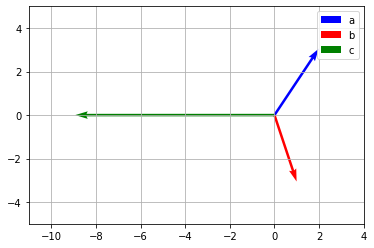

In [159]:
plot_2d_vectors(vectors=[[2, 3], [1, -3], [-9, 0]], labels=['a', 'b', 'c'], colors=['b', 'r', 'g'])

#### Dot Product Examples

`np.dot()`

We will use these vectors in the examples that follow

In [161]:
d = np.array([[2, 3]]); print(d.shape, d.ndim)
e = np.array([[1], [5]]); print(e.shape, e.ndim)
f = np.array([[1], [3], [-5]]); print(f.shape, f.ndim)
g = np.array([[4, -2, -1]]); print(g.shape, g.ndim)

(1, 2) 2
(2, 1) 2
(3, 1) 2
(1, 3) 2


You see we can get the dot product of the `(1x2)` and `(2x1)` matrix because they share the inner dimension `2`

In [162]:
d_dot_e = np.dot(d,e); print('d dot e: {}'.format(d_dot_e))
f_dot_g = np.dot(f,g); print('g dot g: {}'.format(f_dot_g))
e_dot_g = np.dot(e,g); print('e dot g: {}'.format(e_dot_g))

d dot e: [[17]]
g dot g: [[  4  -2  -1]
 [ 12  -6  -3]
 [-20  10   5]]
e dot g: [[  4  -2  -1]
 [ 20 -10  -5]]


In the example below we can see that the dot product of two perpendicular vectors is 0.

In [121]:
# Dot product of orthogonal vectors is 0
a = np.array([-12, 16])
b = np.array([12,9])
c = np.dot(a,b);c

0

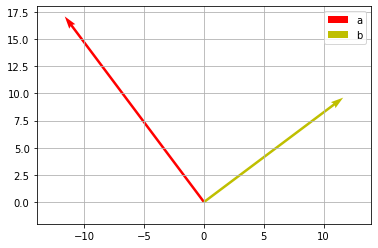

In [129]:
plot_2d_vectors([a, b], labels=['a', 'b'])

But not the `3x1` and `2x1` because they don't the same dimensions

In [131]:
np.dot(e,f)

ValueError: shapes (2,1) and (3,1) not aligned: 1 (dim 1) != 3 (dim 0)

In [132]:
# Print out the shape (ie dimensions) of e, f
print('Dimension of vector e is {} (shape {})'.format(e.ndim, e.shape))
print('Dimension of vector f is {} (shape {})'.format(f.ndim, f.shape))

Dimension of vector e is 2 (shape (2, 1))
Dimension of vector f is 2 (shape (3, 1))


### Matrix-Vector Multiplication

So far we've learned that multiplying a scalar by a vector or matrix just multiplies the scalar element-wise. We then learned that if we are multiplying two vectors we can use the cross or dot product. Now we will see how to multiply a matrix and a vector.

${\displaystyle {\begin{bmatrix}a&b\\c&d\end{bmatrix}} {\begin{bmatrix}x\\y\end{bmatrix}} = {\begin{bmatrix}ax+by\\cx+dy\end{bmatrix}}}$

This should look pretty familiar, actually for matrix vector multiplication, what we are doing is taking the dot product of each column vector in the matrix! So we already know how to do this...let's check out an example.

In [31]:
M = np.array([[1, 2],
              [4, 3],
              [5, 1]])
V = np.array([2, 3])
print(M)
print(V)

[[1 2]
 [4 3]
 [5 1]]
[2 3]


In [32]:
print(M.shape)
print(V.shape)

(3, 2)
(2,)


In [35]:
result = np.dot(M, V)
print(result)
print(result.shape)

[ 8 17 13]
(3,)


We see that M is a `3x2` matrix and V is a `2x1` and the result is a `3x1` matrix.

The shapes of matrices/vectors is actually really important when multiplying them...

As rule when we do matrix multiplication, we can say that they must share an inner dimension and the result matrix dimensions will equal the outer dimension.

For example if we multiply a `4x2` and `2x3`
- they share the inner dimension (2) so we can multiply them
- the dimension of the result will be the outer dimension (4x3)

For example if we multiply a `5x4` and `4x2`
- they share the inner dimension (4) so we can multiply them
- the dimension of the result will be the outer dimension (5x2)

## Check for Understanding and Practice Problems

Complete the following exercises to check your understanding of the concepts in this section.

*Note: Answers are available in the appendix.*

### 1.1 Plot the following column vectors of the matrix

$$
{\displaystyle M ={\begin{pmatrix}-2&1\\1&3\end{pmatrix}}}
$$

*Hint: Use the plot_2d_vectors() function from the Helper Functions in the Workbook Setup section if you don't want to use raw matplotlib.*

In [6]:
# YOUR ANSWER HERE

### 1.2 Scale the vectors by 2 and plot the result. What would the result be if you scaled them by a negative number (ie. -2) instead?

$$
{\displaystyle M ={\begin{pmatrix}-2&1\\1&3\end{pmatrix}}}
$$

*Hint: What is 2M? What is -2M?*

In [ ]:
# YOUR ANSWER HERE

### 1.3 Draw the adjancy matrix for the following graph

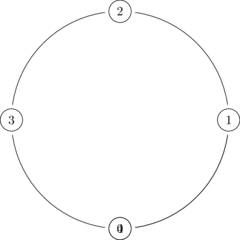

In [49]:
%%tikz
\def \n {4}
\def \radius {3cm}
\def \margin {8} % margin in angles, depends on the radius

\foreach \s in {0,...,\n}
{
  \node[draw, circle] at ({360/\n * (\s - 1)}:\radius) {$\s$};
  \draw[-, >=latex] ({360/\n * (\s - 1)+\margin}:\radius) 
    arc ({360/\n * (\s - 1)+\margin}:{360/\n * (\s)-\margin}:\radius);
}

In [7]:
# YOUR ANSWER HERE

### 1.4 Write the following system of equations as a matrix

$$
2x - 1y = 6\\
-1x + 5y = 4
$$

In [8]:
# YOUR ANSWER HERE

### 1.5 Plot the cross section of the fluid represented by the matrix M

X and Y are the coordinate points while U is the speed of the fluid.


*Hint: Plot each vector as a point.*

In [105]:
w = 5
Y, X = np.mgrid[-w:w:50j, -w:w:50j]
U = -1 - X**2 + Y
U

array([[-31.        , -29.00083299, -27.0849646 , ..., -27.0849646 ,
        -29.00083299, -31.        ],
       [-30.79591837, -28.79675135, -26.88088297, ..., -26.88088297,
        -28.79675135, -30.79591837],
       [-30.59183673, -28.59266972, -26.67680133, ..., -26.67680133,
        -28.59266972, -30.59183673],
       ...,
       [-21.40816327, -19.40899625, -17.49312786, ..., -17.49312786,
        -19.40899625, -21.40816327],
       [-21.20408163, -19.20491462, -17.28904623, ..., -17.28904623,
        -19.20491462, -21.20408163],
       [-21.        , -19.00083299, -17.0849646 , ..., -17.0849646 ,
        -19.00083299, -21.        ]])

In [ ]:
# YOUR ANSWER HERE

### 1.6 Perform the following operation on the matrix

$$
Ax = ?
$$

Where $A$ and $x$ as follows

$$
{\displaystyle A ={\begin{pmatrix}-2&1&3\\1&3&2\\3&8&1\end{pmatrix}}}
$$

$$
{\displaystyle x =2}
$$

In [108]:
# YOUR ANSWER HERE

### 1.7 Write the following system of equations as a matrix

$$
4x_0 + 2x_1 - 4x_2 = 0\\
2x_0 - 9x_1 + 1x_2 = 2\\
1x_0 + 5x_1 + 2x_2 = 12\\
$$

In [ ]:
# YOUR ANSWER HERE

### 1.8 Find the result of vector addition defined by the vector below

$$
V + W = ?
$$

Where $V$ and $W$ are as follows

$$
{\displaystyle V ={\begin{pmatrix}3\\6\end{pmatrix}}}
$$

$$
{\displaystyle W ={\begin{pmatrix}-2\\2\end{pmatrix}}}
$$

In [ ]:
# YOUR ANSWER HERE

### 1.9 Find the cross product $U \times V$ and interpret the result

Find the cross product ${\displaystyle U \times V}$ where $U$ and $V$ are as follows

$$
{\displaystyle U ={\begin{pmatrix}2\\1\end{pmatrix}}}
$$

$$
{\displaystyle V ={\begin{pmatrix}-2\\-1\end{pmatrix}}}
$$

In [2]:
# YOUR ANSWER HERE

&#11088; **Pause and Ponder** &#11088;
What would the cross product be if the vectors were perpendicular to each other?

### 1.10 Find the vector V such that $U \cdot V = 0$

$$
{\displaystyle U \cdot ? = 0 }
$$

Where $U = {\begin{pmatrix}2&0\end{pmatrix}}$

In [1]:
# YOUR ANSWER HERE

# 2.0 Linearity and Transformations

We will be talking about linearity, linear dependence/independence and linear transformations a lot moving forward make sure you spend enough time in this lesson understanding the concepts and being able to do the exercises.

Watch the lesson and run through the examples that follow. This lesson covers the following topics:

* Linearity, linear transformations
* Linear dependence / independence
* Span
* Basis
* Orthogonal
* Orthonormal

## Lesson

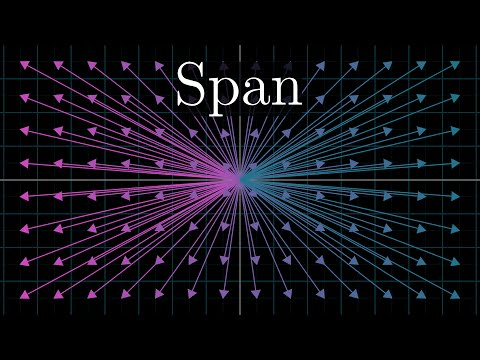

In [126]:
# Video: Linear Combinations, span and basis vectors
# https://www.youtube.com/watch?v=k7RM-ot2NWY&list=PLZHQObOWTQDPD3MizzM2xVFitgF8hE_ab&index=3&t=0s
YouTubeVideo("k7RM-ot2NWY", width=600, height=350, start=0)

**Video Summary**

* Collections of vectors can be thought of and represented using points on a graph

* The **span** of two given vectors is all of their linear combinations; the set of all possible vectors that you can reach with linear combinations of those to vectors. It forms what you can think of as the plane of those vectors.

* The **basis** of a vector space is a subset of vectors in that are linearly independent and span the vector space

* Two vectors are **linearly dependent** if one can be expressed as a linear combination of the other; ie its linearly dependent if its already in the span of the others
> $\vec{u} = a \vec{v} + b \vec{w}$, where a and b are scalar values

* Two vectors are **linearly independent** if they add a new dimension to the span
> $\vec{u} \ne a \vec{v} + b \vec{w}$, for all scalars a and b

*Note: another way that is common to think of linearly independent vectors $\vec{v}$, $\vec{w}$, and $\vec{u}$ is that the only solution to $a\vec{v} + b\vec{w} + c\vec{u} = 0$ is $a = b = c = 0$*


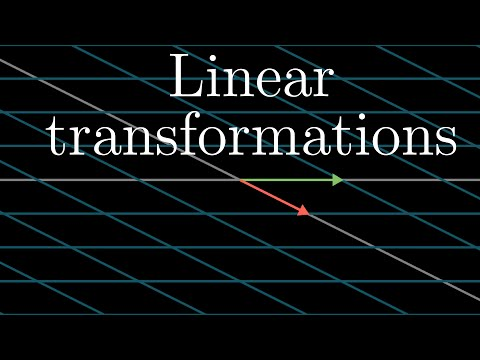

In [127]:
# Video: Linear transformations and matrices
# https://www.youtube.com/watch?v=kYB8IZa5AuE&list=PLZHQObOWTQDPD3MizzM2xVFitgF8hE_ab&index=4&t=0s
YouTubeVideo("kYB8IZa5AuE", width=600, height=350, start=0)

**Video Summary**

* Anytime you are adding or scaling vectors you are performing **linear transformations**

* Matrix vector multiplication can be thought of as the **transformation of a vector by a matrix**

* Linear transformations keep gridlines **parallel and evenly spaced**

A few extra vocabulary words that were not covered in the video but you will need to know

* **Orthogonal vectors** are vectors that are at right angles from each other; it then follows that they are linearly independent.

* **Orthonormal vectors** are orthogonal and normalized (ie unit vectors)

**Additional Optional Videos**

The following videos offer a bit more insight if you'd like to take the time to watch them. They are not necessary for finishing the lesson but are short and may help your understanding.

In [156]:
# Video: Transformations between dimensions
# https://www.youtube.com/watch?v=v8VSDg_WQlA&list=PLZHQObOWTQDPD3MizzM2xVFitgF8hE_ab&index=9&t=0s
# YouTubeVideo("v8VSDg_WQlA", width=600, height=350, start=0)

In [12]:
# Video: 3D linear transformations
# https://www.youtube.com/watch?v=rHLEWRxRGiM&list=PLZHQObOWTQDPD3MizzM2xVFitgF8hE_ab&index=6&t=0s
# YouTubeVideo("rHLEWRxRGiM", width=600, height=350, start=0)

## Check for Understanding and Practice Problems

Complete the following exercises to check your understanding of the concepts in this section.

*Note: Answers are available in the appendix.*

### 2.1 Which of the following sets of vectors form a basis in 3-dimensional vectorspace ($\mathbf {R^3}$)?

$$
{\displaystyle S_1 ={\begin{bmatrix}1\\5\\9\end{bmatrix}},{\begin{bmatrix}2\\6\\10\end{bmatrix}},{\begin{bmatrix}3\\7\\11\end{bmatrix}},{\begin{bmatrix}4\\8\\12\end{bmatrix}}}
$$

$$
{\displaystyle S_2 ={\begin{bmatrix}2\\1\\1\end{bmatrix}},{\begin{bmatrix}4\\2\\2\end{bmatrix}}}
$$

$$
{\displaystyle S_3 ={\begin{bmatrix}1\\4\\7\end{bmatrix}},{\begin{bmatrix}2\\5\\8\end{bmatrix}},{\begin{bmatrix}3\\6\\9\end{bmatrix}}}
$$

We know from the lesson that a basis is any linearly independent vectors that span the vectorspace. The vectorspace in this case is $\mathbf{R^3}$ so we are looking for three linearly independent vectors. 

In this case we don't even have to check for linear independence because we can see from visual inspection that 

* $S_1$ contains four vectors, one more than is necessary to describe the basis of the vectorspace $\mathbf{R^3}$

* $S_2$ contains two vectors, ...

* $S_3$ contains three vectors, ...

In [36]:
# YOUR ANSWER HERE

### 2.2 Are the following vectors linearly independent? Demonstrate how you know.

Consider the following vectors

$$
{\displaystyle S = {\begin{bmatrix}1\\0\\-1\end{bmatrix}},{\begin{bmatrix}2\\1\\-1\end{bmatrix}},{\begin{bmatrix}-2\\1\\4\end{bmatrix}}}
$$

Determine if they are linearly independent.

If the vectors are linearly independent, the only solution to $a\vec{v} + b\vec{w} + c\vec{u} = 0$ is $a = b = c = 0$


Consider the linear combination of vectors

$$
{\displaystyle {\begin{bmatrix}1\\0\\-1\end{bmatrix}}x_1 + {\begin{bmatrix}2\\1\\-1\end{bmatrix}}x_2 + {\begin{bmatrix}-2\\1\\4\end{bmatrix}}x_3 = {\begin{bmatrix}0\\0\\0\end{bmatrix}}}
$$

or written in matrix form

$$
{\displaystyle {\begin{bmatrix}1&2&-2\\0&1&1\\-1&-1&4\end{bmatrix}}{\begin{bmatrix}x_1\\x_2\\x_3\end{bmatrix}}={\begin{bmatrix}0\\0\\0\end{bmatrix}}}
$$

In [51]:
a = np.array([[1, 2, -2],
              [0, 1, 1],
              [-1, -1, 4]])
b = np.zeros(a.shape[0])

np.linalg.solve(a, b)

array([0., 0., 0.])

The only solution is is $x_1 = x_2 = x_3 = 0$ so they are linearly independent!

*Note: there is a better way to check linear dependence using the determinant which we will learn in the next lesson. We could use `linalg.solve()` but if we ask it to solve for x given a and b where the column vectors of a do not have a unique solution...*

In [37]:
# YOUR ANSWER HERE

### 2.3 Are the column vectors of the matrix linearly independent? Demonstrate how you know.

Consider the column vectors of the matrix below, are they all linearly independent?

$$
{\displaystyle a = {\begin{bmatrix}1&2&3\\4&5&6\\7&8&9\end{bmatrix}}}
$$

In [52]:
a = np.array([[1, 2, 3],
              [4, 5, 6],
              [7, 8, 9]])
b = np.zeros(a.shape[0])
print(a)
print(b)

# Will throw an error because there isn't a unique solution
# np.linalg.solve(a, b)

[[1 2 3]
 [4 5 6]
 [7 8 9]]
[0. 0. 0.]


In [38]:
# YOUR ANSWER HERE

### 2.4 Perform matrix vector multiplication

$$
{\displaystyle M\vec{a} = {\begin{bmatrix}1&2&3\\4&5&6\\7&8&9\end{bmatrix}}{\begin{bmatrix}4\\2\\1\end{bmatrix}}}
$$

In [57]:
M = np.array([[1, 2, 3],
              [4, 5, 6],
              [7, 8, 9]])
a = np.array([4, 2, 1])
print_a(M)
print_a(a)

result = np.dot(M, a)
print_a(result)

Dim: 2
Shape: (3, 3)
[[1 2 3]
 [4 5 6]
 [7 8 9]]
Dim: 1
Shape: (3,)
[4 2 1]
Dim: 1
Shape: (3,)
[11 32 53]


In [53]:
# YOUR ANSWER HERE

### 2.5 Draw the linear transformation of any vector described by the matrix below

$$
{\displaystyle M = {\begin{bmatrix}0&-1\\1&0\end{bmatrix}}}
$$

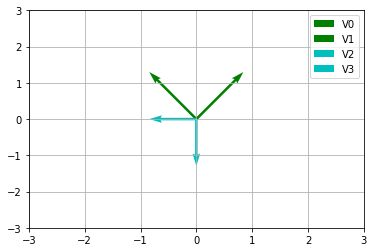

In [65]:
M = np.array([[0, -1], [1, 0]])

V0 = np.array([1, 1])
V1 = np.dot(M, V0)

V2 = np.array([-1, 0])
V3 = np.dot(M, V2)

plot_2d_vectors([V0, V1, V2, V3])

Looks like this matrix rotates vectors by 90 degrees.

In [58]:
# YOUR ANSWER HERE

### 2.6 Draw the linear transformation of any vector described by the matrix below

$$
{\displaystyle M = {\begin{bmatrix}1&0\\0&-1\end{bmatrix}}}
$$

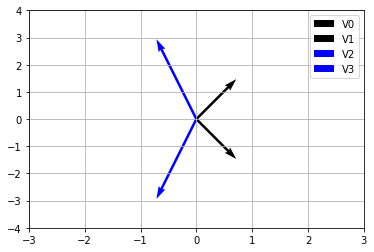

In [68]:
M = np.array([[1, 0], [0, -1]])

V0 = np.array([1, 1])
V1 = np.dot(M, V0)

V2 = np.array([-1, -2])
V3 = np.dot(M, V2)

plot_2d_vectors([V0, V1, V2, V3])

This matrix reflects vectors over the x axis.

In [58]:
# YOUR ANSWER HERE

### 2.7 Draw the linear transformation of any vector described by the matrix below

$$
{\displaystyle M = {\begin{bmatrix}2&0\\0&2\end{bmatrix}}}
$$

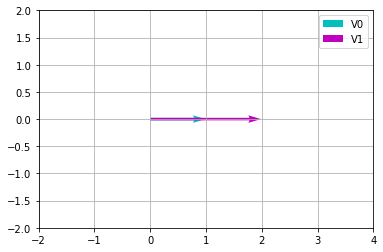

In [70]:
M = np.array([[2, 0], [0, 2]])

V0 = np.array([1, 0])
V1 = np.dot(M, V0)

plot_2d_vectors([V0, V1])

This matrix scales the vector.

In [58]:
# YOUR ANSWER HERE

In [71]:
# YOUR ANSWER HERE

# 3.0 Properties of Matrices

Matrices have certain properties that can tell us a variety of things about the matrix. In this lesson we will learn about these properties so that in the following lessons we can use them for calculations and understanding our data better.

Complete the lesson and the examples that follow. This lesson covers the following topics:

* Transpose and Identity
* Determinant and Inverse
* Rank, Column Space, Null Space
* Eigenvectors and Eigenvalues

## Lesson

### Transpose and Identity

The **transpose** of a matrix ${\displaystyle \mathbf {A} }$ (denoted ${\displaystyle \mathbf {A} ^{\operatorname {T} }}$) can be obtained by reflecting the elements along its main diagonal.

An **identity** matrix (denoted ${\displaystyle \mathbf {I} }$) is a square matrix with 1s along the diagonal and 0s everywhere else

Important Properties
* ${\displaystyle IA=AI=A}$, multiply the identity matrix by a vector and its doesn't do anything
* A matrix is **symetric** if ${\displaystyle \mathbf {A} ^{\operatorname {T} }=\mathbf {A} .}$

#### Transpose Examples

$$
{\displaystyle {\begin{bmatrix}1&2\end{bmatrix}}^{\operatorname {T} }=\,{\begin{bmatrix}1\\2\end{bmatrix}}}
$$

In [132]:
B = np.array([[1, 2]])
print(B)
print(np.transpose(B))

[[1 2]]
[[1]
 [2]]


<img src="img/Matrix_transpose.gif" alt="matrix transpose" width="100"/>

In [133]:
A = np.array([[1, 2],
              [3, 4],
              [5, 6]
             ])
print(A)
print(np.transpose(A))

[[1 2]
 [3 4]
 [5 6]]
[[1 3 5]
 [2 4 6]]


That's it for understanding transpose....just flip it along the main diagonal!

#### Identity Examples

Numpy has a shortcut for creating identity matrices.

In [135]:
I = np.eye(3)
I

array([[1., 0., 0.],
       [0., 1., 0.],
       [0., 0., 1.]])

We can see that the identity matrix visually looks like the unit vectors for each dimension.

xlim: 0, 1.0
ylim: 0, 1.0
zlim: 0, 1.0


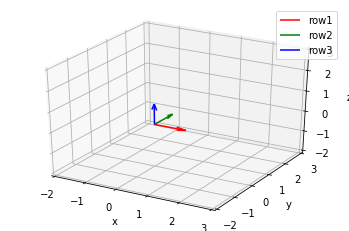

In [136]:
plot_3d_vectors(vectors=I, labels=['row1', 'row2', 'row3'], colors=['r', 'g', 'b'])

#### Properties

${\displaystyle IA=AI=A}$, multiply the identity matrix by a vector and its doesn't change the original vector. Let's see an example

In [146]:
A = np.array([1, 3])

I = np.eye(A.ndim)

print(A)
print(I)

[1 3]
[[1.]]


In [148]:
A*I

array([[1., 3.]])

We can also say that a matrix is **symetric** if ${\displaystyle \mathbf {A} ^{\operatorname {T} }=\mathbf {A} .}$ In the case of the matrix below, we can see that it's symetric in this case because its small but it helps to have a quick mathematical trick to be able to check for larger matrices. Luckily, we can just numpy to check the equality of the transpose to check for symetry.

In [106]:
# Symmetric = S_transpose = S
S = np.array([[1, 7, 3],
              [7, 4, -5],
              [3, -5, 6]])
S == S.T

array([[ True,  True,  True],
       [ True,  True,  True],
       [ True,  True,  True]])

### Determinant and Inverse

The **determinant** of a matrix ${\displaystyle \mathbf {A} }$ (denoted ${\displaystyle \mathbf {{\begin{vmatrix}A\end{vmatrix}}} }$) is a scalar number that can be calculated from a square matrix as follows
> ${\displaystyle {\begin{vmatrix}a&b\\c&d\end{vmatrix}} = ad - bc}$

The **inverse** of ${\displaystyle \mathbf {A} }$ (denoted ${\displaystyle \mathbf {A} ^{\operatorname {-1} }}$) exists only when the product of the two is ${\displaystyle \mathbf {I} }$ (the identity matrix).

Important Properties
* ${\displaystyle \det (A) = 0}$, det is 0 if matrix $A$ is not invertible
* ${\displaystyle \det (I) = 1}$, determinant of identity matrix is 1
* ${\displaystyle \det (A^{T}) = \det (A)}$, determinant of $A^{T}$ is the same as the determinant of $A$
* ${\displaystyle \det (A^{-1}) = [\det (A)]^{-1}}$
* ${\displaystyle \det (AB) = \det (A) \det (B)}$, for square matrices of equal size 

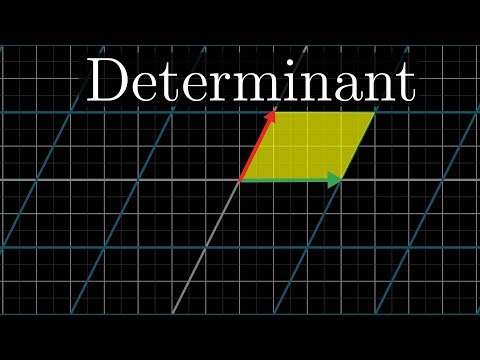

In [149]:
# Video: Determinants
# https://www.youtube.com/watch?v=Ip3X9LOh2dk&list=PLZHQObOWTQDPD3MizzM2xVFitgF8hE_ab&index=7&t=0s
YouTubeVideo("Ip3X9LOh2dk", width=600, height=350, start=0)

**Video Summary**

* The **determinant** of a transformation can be thought of as the factor by which a linear transformation changes any area

* Checking if the determinant of a transformation is zero (**det(T) = 0**) tells us whether the transformation squishes the matrix into a smaller dimension.

* If the **determinant is a negative number** the transformation is flipping/inverting space; the absolute value of the determinant however will tells you the factor by which areas are scaled.

* The columns of a matrix A are **linearly dependent if the det = 0** (this is called a **singular matrix**)

*Note: Don't worry about the term "linearly dependent" right now. We'll get to that in the next section. Just keep in the back of your head that calculating if the determinant is zero can tell us about linear dependence.*

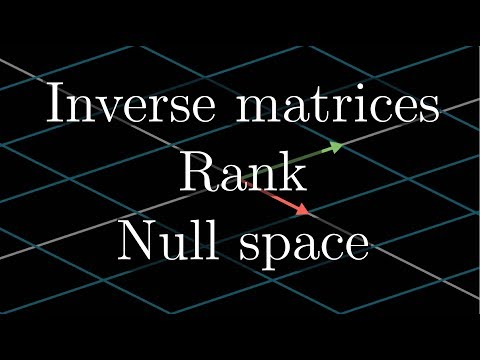

In [150]:
# Video: Inverse
# https://www.youtube.com/watch?v=uQhTuRlWMxw&list=PLZHQObOWTQDPD3MizzM2xVFitgF8hE_ab&index=8&t=0s
YouTubeVideo("uQhTuRlWMxw", width=600, height=350, start=0)

**Video Summary**

* We can think of the inverse as the transformation that gives us the "opposite" of transformation or "undoes" it

* If determinant doesn't equal 0, the inverse exists; you can think of this geometrically as not being able to unsquish a line

* The **rank** of a matrix is the number of dimensions in the output of a transformation; the number of dimensions in the **column space**

* The **column space** of a matrix is the set of all possible outputs for your matrix; the span of the columns of your matrix

* The **null space** of a matrix is the set of vectors that lands on the origin 

#### Determinant Examples

Geometrically, the determinant can be thought of as the scaling factor of the linear transformation described by the matrix.

It is calculated using this formula:
${\displaystyle {\begin{aligned}|A|={\begin{vmatrix}a&b\\c&d\end{vmatrix}}=ad-bc.\end{aligned}}}$

The determinant of larger matrices is just the sum of the determinant of the smaller matrices (think of the empty squares as the rows and columns we are ignoring in each sum).

<img width="500" src="img/determinant.svg"></img>

[Source](https://en.wikipedia.org/wiki/Determinant)

Luckily, you don't really have to remember that or calculate it...we can let the computer calculate it for us. Just make sure you understand what the determinant is calculating.

In [151]:
A = np.array([[1, 1],[0, 1]])
A_det = np.linalg.det(A)
print(A)
print(A_det)

[[1 1]
 [0 1]]
1.0


In [152]:
B = np.array([[3, 0],[0, 2]])
print(B)
print(np.linalg.det(B))

[[3 0]
 [0 2]]
6.0


#### Inverse Examples

Say we have a matrix

${\displaystyle \mathbf {A} ={\begin{pmatrix}4&7\\2&6\end{pmatrix}}}$

In [48]:
A = np.array([[4, 7],[2,6]])
print(A)

[[4 7]
 [2 6]]


And calculate its inverse

${\displaystyle \mathbf {B} ={\begin{pmatrix}.6&-.7\\-.2&.4\end{pmatrix}}}$

In [51]:
B = np.linalg.inv(A)
print(B)

[[ 0.6 -0.7]
 [-0.2  0.4]]


We can verify that A and B are inverses by checking their product is the identity matrix.

${\displaystyle \mathbf {I} ={\begin{pmatrix}1&0\\0&1\end{pmatrix}}}$

In [50]:
print(np.matmul(A, B).astype(int))
print(np.matmul(B, A).astype(int))

[[1 0]
 [0 1]]
[[1 0]
 [0 1]]


&#11088; **Pause and Ponder** &#11088;

Recall from the video what this means geometrically...why do we get the identity matrix (ie. the matrix that does "nothing")?

### Eigenvalues and Eigenvectors

`v` is an eigenvector of a square matrix `A` if it stretches but doesn't change the direction of `A`; the eigenvalue ($\lambda$) is the scaling factor.

More formally, we can say that if you multiply a matrix, `A` by an eigenvector, `v`, then the vector `Av` will be a number (scalar) times the original `v`.

$$
{\displaystyle A\mathbf {v} =\lambda \mathbf {v}}
$$

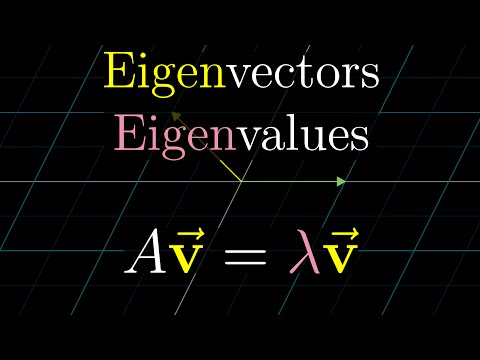

In [16]:
# Video: Eigenvectors and Eigenvalues
# https://www.youtube.com/watch?v=PFDu9oVAE-g&list=PLZHQObOWTQDPD3MizzM2xVFitgF8hE_ab&index=15&t=0s
YouTubeVideo("PFDu9oVAE-g", width=600, height=350, start=0)

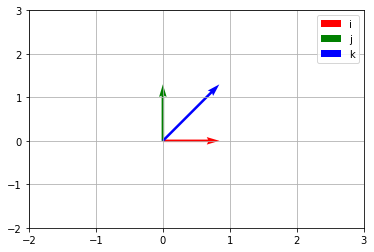

In [128]:
# See that ...
i = [1, 0]
j = [0, 1]
plot_2d_vectors(vectors=[i, j, k], labels=['i', 'j', 'k'], colors=['r', 'g', 'b'])

In [101]:
eig_vals, eig_vects = np.linalg.eig([i, j, k])
print(eig_vals)
print(eig_vects)

NameError: name 'i' is not defined

Let's take the matrix ${\displaystyle A={\begin{bmatrix}2&1\\1&2\end{bmatrix}}}$ and calculate its eigenvalues and eigenvectors.

For example, we have a matrix ${\displaystyle A={\begin{bmatrix}2&1\\1&2\end{bmatrix}}}$

In [201]:
A = np.array([[2, 1], [1, 2]])
A

array([[2, 1],
       [1, 2]])

In [ ]:
eig_vals, eig_vects = np.linalg.eig([[1, 1], [1, 1]])
print(eig_vals)
print(eig_vects)

Let the computer calculate the eigenvalues and vectors

In [202]:
eig_vals, eig_vects = np.linalg.eig(A)
print(eig_vals)
print(eig_vects)

[3. 1.]
[[ 0.70710678 -0.70710678]
 [ 0.70710678  0.70710678]]


But let prove to ourselves that the calculations are correct. To do that, we need to prove that $A\mathbf {v} =\lambda \mathbf {v}$ or the matrix times the eigenvector is equal to some scaing factor lambda times that eigenvector.

First let's rearrange the equation

$$
A v=\lambda v
$$

move everything to one side of the equation

$$
A v - \lambda v = 0
$$

factor out the eigenvector $v$

$$
(A-\lambda I)v=0
$$

we know $v$ isn't the zero vector so that leaves the other part of the equation that must equal 0

$$
{\displaystyle |A-\lambda I|={\begin{vmatrix}2-\lambda &1\\1&2-\lambda \end{vmatrix}}=3-4\lambda +\lambda ^{2}}
$$


Let start with the first eigenvalue $\lambda = 3$ then calculate the determinant of $A - \lambda I$ or as its commonly written $|A-\lambda I|$

$$
{\displaystyle |A-\lambda I|={\begin{vmatrix}2-\lambda &1\\1&2-\lambda \end{vmatrix}}=3-4\lambda +\lambda ^{2}}
$$

$$
{\displaystyle |A-3I|=3-4(3) + 3^{2} = 0}
$$

In [151]:
# Prove the 1st eigenvalue (eig_vals[0]) is an eigenvalue
I = np.eye(2, 2)
np.linalg.det(A-(eig_vals[0]*I))

0.0

In [152]:
# Prove the 2nd eigenvalue (eig_vals[1]) is an eigenvalue
I = np.eye(2, 2)
np.linalg.det(A-(eig_vals[1]*I))

0.0

We can double check to make sure that the original vector `A` is a linear combination of the eigenvector scaled by the eigenvalues.

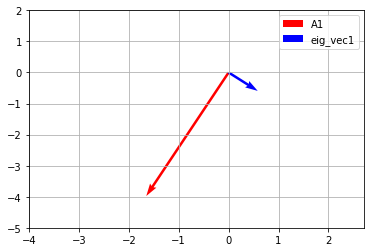

In [139]:
plot_2d_vectors([[-2, -3], eig_vects[0]], labels=['A1', 'eig_vec1'], colors=['r', 'b'])

## Check for Understanding and Practice Problems

Complete the following exercises to check your understanding of the concepts in this section.

*Note: Answers are available in the appendix.*

### 3.1 Find the transpose of the matrix

$$
{\displaystyle M = {\begin{bmatrix}1&2&3\\4&5&6\end{bmatrix}}}
$$

In [87]:
M = np.array([[1, 2, 3],
              [4, 5, 6]])
print(M)
print(M.T)

[[1 2 3]
 [4 5 6]]
[[1 4]
 [2 5]
 [3 6]]


In [75]:
# YOUR ANSWER HERE

### 3.2 Find the corresponding identity matrix

$$
{\displaystyle M = {\begin{bmatrix}1&2&3\\4&5&6\\7&8&9\end{bmatrix}}}
$$

In [81]:
M = np.array([[1, 2, 3],
              [4, 5, 6],
              [7, 8, 9]])
np.eye(M.shape[0])

array([[1., 0., 0.],
       [0., 1., 0.],
       [0., 0., 1.]])

&#11088; **Pause and Ponder** &#11088;

Can you find the identity matrix of a non-square matrix? Try it and take note of what happens when you try using numpy

In [82]:
np.eye(2, 3)

array([[1., 0., 0.],
       [0., 1., 0.]])

In [83]:
np.eye(5, 2)

array([[1., 0.],
       [0., 1.],
       [0., 0.],
       [0., 0.],
       [0., 0.]])

In [76]:
# YOUR ANSWER HERE

### 3.3 Find the determinant of the matrix. Interpret the results

$$
{\displaystyle M = {\begin{bmatrix}2&-3&0\\2&-5&0\\0&0&3\end{bmatrix}}}
$$

We can find the determinant using `np.linalg.det()`

In [88]:
M = np.array([[2, -3, 0],
              [2, -5, 0],
              [0, 0, 3]])
np.linalg.det(M)

-12.0

The determinant is negative which has the geometric interpretation of flipping space. Because the determinant isn't zero, we can also say that the columns are linearly independent.

In [77]:
# YOUR ANSWER HERE

### 3.4 Find the determinant of the matrix

$$
{\displaystyle M = {\begin{bmatrix}2&-3&0\\2&-5&0\end{bmatrix}}}
$$

This is a non-square matrix!! No determinant is defined.

In [74]:
# YOUR ANSWER HERE

### 3.5 Find the inverse of the matrix

$$
{\displaystyle M = {\begin{bmatrix}2&-4&-1\\1&-2&-2\\0&0&3\end{bmatrix}}}
$$

In [96]:
M = np.array([[2, -4, 0],
              [1, -2, 0],
              [0, 0, 3]])
np.linalg.det(M)

0.0

We know that a matrix is invertible if the determinant is non-zero, unfortunately in this case looks like the determinant is zero (ie. not all columns are linearly independent)

In [98]:
# Trying to take the inverse will fail
# np.linalg.inv(M)

In [89]:
# YOUR ANSWER HERE

### 3.6 Find the inverse of the matrix

$$
{\displaystyle M = {\begin{bmatrix}2&-4&-1\\1&3&-2\\0&0&3\end{bmatrix}}}
$$

In [99]:
M = np.array([[2, -4, -1],
              [1, 3, -2],
              [0, 0, 3]])
np.linalg.det(M)

29.99999999999999

Non-zero determinant so the matrix has an inverse.

In [100]:
np.linalg.inv(M)

array([[ 0.3       ,  0.4       ,  0.36666667],
       [-0.1       ,  0.2       ,  0.1       ],
       [ 0.        ,  0.        ,  0.33333333]])

In [90]:
# YOUR ANSWER HERE

### 3.7 Calculate the eigenvectors and eigenvalues of the matrix

$$
{\displaystyle M = {\begin{bmatrix}2&-4&-1\\1&-2&-2\\0&0&3\end{bmatrix}}}
$$

In [107]:
M = np.array([[2, -4, -1],
              [1, -2, -2],
              [0, 0, 3]])
M

array([[ 2, -4, -1],
       [ 1, -2, -2],
       [ 0,  0,  3]])

In [103]:
eig_vals, eig_vects = np.linalg.eig(M)
print(eig_vals)
print(eig_vects)

[0. 0. 3.]
[[ 0.89442719  0.89442719  0.30151134]
 [ 0.4472136   0.4472136  -0.30151134]
 [ 0.          0.          0.90453403]]


This means that the eigenvector scales the matrix by the eivenvalues but doesn't change the direction of the original matrix.

In [91]:
# YOUR ANSWER HERE

### 3.8 Determine if the column space of the matrix is linearly independent

$$
{\displaystyle M = {\begin{bmatrix}2&1\\1&-3\end{bmatrix}}}
$$

In [108]:
M = np.array([[2, 1],
              [1, -3]])
np.linalg.det(M)

-7.000000000000001

Looks like the colums are linearly independent because the determinant is non-zero.

In [92]:
# YOUR ANSWER HERE

### 3.9 Determine if the column space of the matrix is linearly independent

$$
{\displaystyle M = {\begin{bmatrix}2&1\\20&10\end{bmatrix}}}
$$

In [113]:
M = np.array([[2, 1],
              [20, 10]])
np.linalg.det(M)

0.0

The determinant is zero so they are linearly dependent. We can further inspect their linear dependence by setting up the following equation and solving for x

In [93]:
# YOUR ANSWER HERE

# <span style="color:blue;">Congrats! Now you have the LA foundation that allows you to check out the AWEsome linear algebra algorithms that allow us to do machine learning and other neat things!</span>

Navigate to the Linear Algebra Algorithms Workbook to dive in!

# Appendix

## Answers to Exercises

### 1.0 Matrix Representations of Data

#### 1.1 Plot the following column vectors of the matrix

$$
{\displaystyle M ={\begin{pmatrix}-2&1\\1&3\end{pmatrix}}}
$$

We can plot these vectors using the plot_2d_vectors function like this

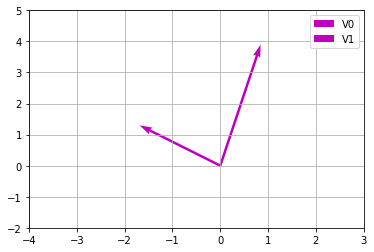

In [22]:
plot_2d_vectors([[-2, 1], [1, 3]])

#### 1.2 Scale the vectors by 2 and plot the result. What would the result be if you scaled them by a negative number (ie. -2) instead?

In [23]:
M = np.array([[-2, 1], [1, 3]])
M

array([[-2,  1],
       [ 1,  3]])

In [27]:
pos_scaled = 2*M
pos_scaled

array([[-4,  2],
       [ 2,  6]])

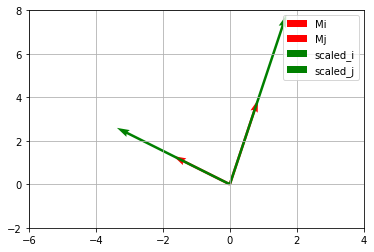

In [35]:
plot_2d_vectors([M[:, 0], M[:, 1], pos_scaled[:, 0], pos_scaled[:, 1]], labels=['Mi', 'Mj', 'scaled_i', 'scaled_j'], colors=['r', 'r', 'g', 'g'])

In [28]:
neg_scaled = -2*M
neg_scaled

array([[ 4, -2],
       [-2, -6]])

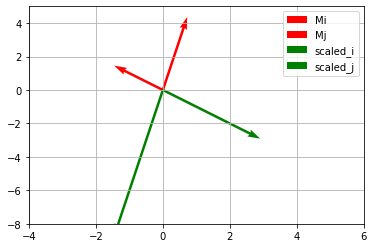

In [36]:
plot_2d_vectors([M[:, 0], M[:, 1], neg_scaled[:, 0], neg_scaled[:, 1]], labels=['Mi', 'Mj', 'scaled_i', 'scaled_j'], colors=['r', 'r', 'g', 'g'])

#### 1.3 Draw the adjancy matrix for the following graph

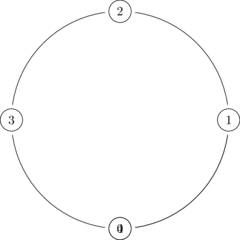

In [48]:
%%tikz
\def \n {4}
\def \radius {3cm}
\def \margin {8} % margin in angles, depends on the radius

\foreach \s in {0,...,\n}
{
  \node[draw, circle] at ({360/\n * (\s - 1)}:\radius) {$\s$};
  \draw[-, >=latex] ({360/\n * (\s - 1)+\margin}:\radius) 
    arc ({360/\n * (\s - 1)+\margin}:{360/\n * (\s)-\margin}:\radius);
}

We can start by initializing a 4x4 matrix of zeros.

In [47]:
M = np.zeros((4, 4))
M

array([[0., 0., 0., 0.],
       [0., 0., 0., 0.],
       [0., 0., 0., 0.],
       [0., 0., 0., 0.]])

Then we can put ones in the 

0 - 1

In [51]:
M[0, 1] = 1
M[1, 0] = 1

M[1, 2] = 1
M[2, 1] = 1

M[2, 3] = 1
M[3, 2] = 1

M[3, 0] = 1
M[0, 3] = 1

M

array([[0., 1., 0., 1.],
       [1., 0., 1., 0.],
       [0., 1., 0., 1.],
       [1., 0., 1., 0.]])

Then we can check the result by plotting it using python's networkx library.

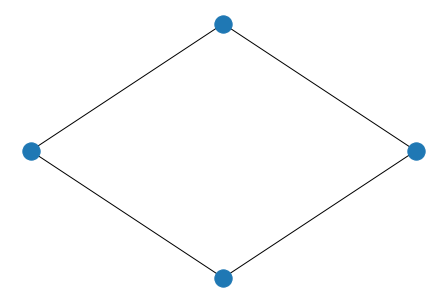

In [53]:
graph = nx.from_numpy_matrix(M)
nx.draw_circular(graph)

Looks right!

#### 1.4 Write the following sytem of equations as a matrix

$$
2x - 1y = 6\\
-1x + 5y = 4
$$

becomes 

$$
{\displaystyle{\begin{pmatrix}2&-1\\-1&5\end{pmatrix}}{\begin{pmatrix}x\\y\end{pmatrix}} = {\begin{pmatrix}6\\4\end{pmatrix}}}
$$

In Python we can write it like this

In [72]:
M = np.array([[2, -1], [-1, 5]])
M

array([[ 2, -1],
       [-1,  5]])

In [74]:
b = np.array([6, 4])
b

array([6, 4])

#### 1.5 Plot the cross section of the fluid represented by these vectors

In [106]:
w = 5
Y, X = np.mgrid[-w:w:50j, -w:w:50j]
U = -1 - X**2 + Y

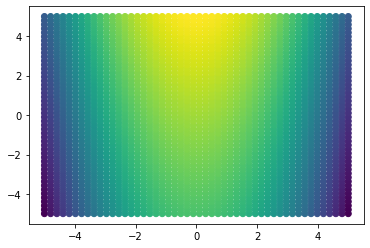

In [107]:
plt.scatter(X, Y, c=U)

In [ ]:
# YOUR ANSWER HERE

#### 1.6 Perform the following operation on the vectors

$$
{\displaystyle 2A = 2 * {\begin{pmatrix}-2&1&3\\1&3&2\\3&8&1\end{pmatrix}}}
$$

$$
{\displaystyle ={\begin{pmatrix}-2(2)&1(2)&3(2)\\1(2)&3(2)&2(2)\\3(2)&8(2)&1(2)\end{pmatrix}}}
$$


In [118]:
A = np.array([[-2, 1, 3],
              [1, 3, 2],
              [3, 8, 1]])
A

array([[-2,  1,  3],
       [ 1,  3,  2],
       [ 3,  8,  1]])

In [119]:
2*A

array([[-4,  2,  6],
       [ 2,  6,  4],
       [ 6, 16,  2]])

#### 1.7 Write the following system of equations as a matrix

$$
4x_0 + 2x_1 - 4x_2 = 0\\
2x_0 - 9x_1 + 1x_2 = 2\\
1x_0 + 5x_1 + 2x_2 = 12\\
$$

As a matrix in the form $Ax = b$ becomes

$$
{\displaystyle {\begin{pmatrix}4x_0 + 2x_1 - 4x_2\\2x_0 - 9x_1 + 1x_2\\1x_0 + 5x_1 + 2x_2\end{pmatrix}} = {\begin{pmatrix}0\\2\\12\end{pmatrix}}}
$$

$$
{\displaystyle {\begin{pmatrix}4&2&-4\\2&-9&1\\1&5&2\end{pmatrix}}{\begin{pmatrix}x_0\\x_1\\x_2\end{pmatrix}} = {\begin{pmatrix}0\\2\\12\end{pmatrix}}}
$$


In [120]:
A = np.array([[4, 2, -4],
              [2, -9, 1],
              [1, 5, 2]])
A

array([[ 4,  2, -4],
       [ 2, -9,  1],
       [ 1,  5,  2]])

In [122]:
b = np.array([0, 2, 12])
b

array([ 0,  2, 12])

#### 1.8 Find the result of vector addition defined by the vector below

$$
V + W = ?
$$

Where $V$ and $W$ are as follows

$$
{\displaystyle V ={\begin{pmatrix}3\\6\end{pmatrix}}}
$$

$$
{\displaystyle W ={\begin{pmatrix}-2\\2\end{pmatrix}}}
$$

We know that addition is done element-wise

$$
{\displaystyle V + W = {\begin{pmatrix}3 + (-2)\\6 + 2\end{pmatrix}} = {\begin{pmatrix}1\\8\end{pmatrix}}}
$$


In [123]:
V = np.array([3, 6])
V

array([3, 6])

In [124]:
W = np.array([-2, 2])
W

array([-2,  2])

In [125]:
V+W

array([1, 8])

#### 1.9 Find the cross product $U \times V$ and interpret the result

We can find the cross product ${\displaystyle U x V}$ where $U$ and $V$ are as follows

$$
{\displaystyle U \times V ={\begin{pmatrix}2\\1\end{pmatrix}} \times {\begin{pmatrix}-2\\-1\end{pmatrix}}}
$$

using `np.cross()` then verify our result using the formula or think about the result geometrically

[2 1]
[-2 -1]
0


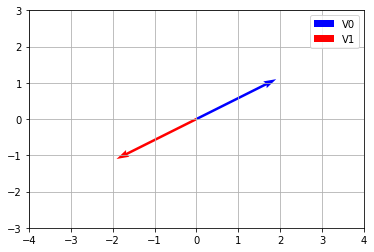

In [23]:
U = np.array([2, 1])
V = np.array([-2, -1])
print(U)
print(V)

cross_prod = np.cross(U, V)
print(cross_prod)

plot_2d_vectors([U, V])

We can see that the vectors point in the exact opposite direction so the cross product will be zero. It would also be zero if they were pointing in the same direction. 

#### 1.10 Find the vector V such that $U \cdot V = 0$

$$
{\displaystyle U \cdot V = 0 }
$$

To solve this we simply need two vectors that are perpendicular

[2 0]


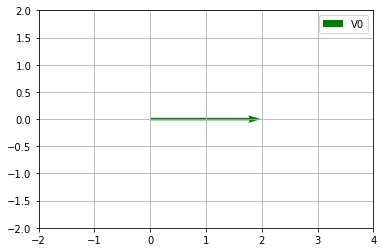

In [26]:
U = np.array([2, 0])
print(U)

plot_2d_vectors([U])

We can see that we need a vector that is vertical....we can choose any $V$ that is vertical

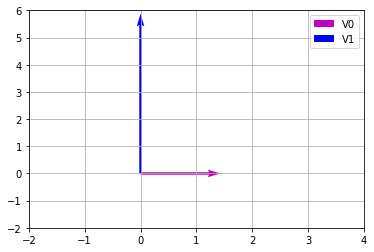

In [27]:
V = np.array([0, 4])

plot_2d_vectors([U, V])

### 2.0 Linearity and Transformations

### 3.0 Properties of Matrices

#### Write the following system of equations as a matrix; then solve

Let's start by taking the system of equations and writing the equivalent matrix form of the equation $Ax = b$ where $A$, $x$ and $b$ are all matrices.

Then the original system of equations...
$$
3x_0 + 1x_1 = 9\\
1x_0 + 2x_1 = 8
$$

becomes 

$$
{\displaystyle{\begin{pmatrix}3x_0&1x_1\\1x_0&2x_1\end{pmatrix}} = {\begin{pmatrix}9\\8\end{pmatrix}}}
$$

$$
{\displaystyle{\begin{pmatrix}3&1\\1&2\end{pmatrix}}{\begin{pmatrix}x_0\\x_1\end{pmatrix}} = {\begin{pmatrix}9\\8\end{pmatrix}}}
$$

$$
Ax=b
$$


Now that it is in the form $Ax = b$, we can solve using `linalg.solve`

In [68]:
A = np.array([[3, 1], [1, 2]])
A

array([[3, 1],
       [1, 2]])

In [69]:
b = np.array([9, 8])
b

array([9, 8])

In [70]:
x = np.linalg.solve(a, b)
x

array([2., 3.])

Then we can check the solution where $x_0 = 2$ and $x_1 = 3$

$$
{\displaystyle{\begin{pmatrix}3&1\\1&2\end{pmatrix}}{\begin{pmatrix}2\\3\end{pmatrix}} = {\begin{pmatrix}9\\8\end{pmatrix}}}
$$

$$
3(2) + 1(3) =? 9\\
1(2) + 2(3) =? 8
$$

Looks good to me!

In [71]:
np.allclose(np.dot(a, x), b)

True

$Ax + ? = b$

Where $A$, $x$ and $b$ are as follows

$$
{\displaystyle A ={\begin{pmatrix}-2&1&3\\1&3&2\\3&8&1\end{pmatrix}}}
$$

$$
{\displaystyle x ={\begin{pmatrix}-2\\2\\1\end{pmatrix}}}
$$

$$
{\displaystyle b ={\begin{pmatrix}1\\4\\2\end{pmatrix}}}
$$

In [109]:
A = np.array([[-2, 1, 3],
              [1, 3, 2],
              [3, 8, 1]])
A

array([[-2,  1,  3],
       [ 1,  3,  2],
       [ 3,  8,  1]])

In [110]:
x = np.array([-2, 2, 1])
x

array([-2,  2,  1])

In [113]:
b = np.array([1, 4, 2])
b

array([1, 4, 2])

We can rearrange the equation to solve for the unknown $? = b - Ax$ then write our matrices out

$$
{\displaystyle ? = b - Ax}
$$

$$
{\displaystyle ? = {\begin{pmatrix}1\\4\\2\end{pmatrix}} - {\begin{pmatrix}-2&1&3\\1&3&2\\3&8&1\end{pmatrix}}{\begin{pmatrix}-2\\2\\1\end{pmatrix}}}
$$

$$
{\displaystyle ? = {\begin{pmatrix}1\\4\\2\end{pmatrix}} - {\begin{pmatrix}-2(-2)+1(2)+3(1)\\1(-2)+3(2)+2(1)\\3(-2)+8(2)+1(1)\end{pmatrix}}}
$$

$$
{\displaystyle ? = {\begin{pmatrix}1\\4\\2\end{pmatrix}} - {\begin{pmatrix}4+2+3\\-2+6+2\\-6+16+1\end{pmatrix}}}
$$

$$
{\displaystyle ? = {\begin{pmatrix}1\\4\\2\end{pmatrix}} - {\begin{pmatrix}9\\6\\11\end{pmatrix}}}
$$

$$
{\displaystyle ? = {\begin{pmatrix}1-9\\4-6\\2-11\end{pmatrix}}}
$$

$$
{\displaystyle ? = {\begin{pmatrix}-8\\-2\\-9\end{pmatrix}}}
$$

In [117]:
Ax = A*x
Ax

array([[ 4,  2,  3],
       [-2,  6,  2],
       [-6, 16,  1]])

In [115]:
b-A*x

array([[ -3,   2,  -1],
       [  3,  -2,   0],
       [  7, -12,   1]])

## Additional Resources

[Linear Algebra Playlist (by 1blue3brown)](https://www.youtube.com/playlist?list=PLZHQObOWTQDPD3MizzM2xVFitgF8hE_ab)

[Understanding Linearity and Linear Transformations (by Khan Academy)](https://www.khanacademy.org/math/linear-algebra/matrix-transformations/linear-transformations/a/visualizing-linear-transformations)

[Numerical Linear Algebra (by Rachel Thomas, Fastai)](https://nbviewer.jupyter.org/github/fastai/numerical-linear-algebra/tree/master/)